Kametay Turar - 2381203 - February 16, 2024

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Task 2.1 Fisher Iris Dataset:**

This dataset of Fisher Iris contains of 150x4 array. Iris_labels.npy file contains classes for Iris to be distinguished.  

In [4]:
#load the data
iris_data = np.load('/content/drive/MyDrive/Colab Notebooks/Iris_data.npy')
iris_labels = np.load('/content/drive/MyDrive/Colab Notebooks/Iris_labels.npy')

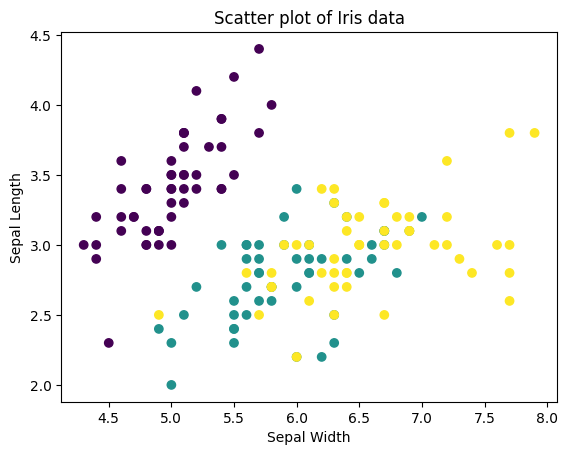

In [5]:
# Create a color map
cmap = plt.cm.viridis

# Extract the unique iris labels
unique_labels = np.unique(iris_labels)

# Ensure consistent data shapes for plotting
colors = cmap(iris_labels / (len(unique_labels) - 1))

# Create the scatter plot
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=colors)

# Add labels and title
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Scatter plot of Iris data')

# Display the plot
plt.show()

**Task 2.2 K-means:**

The code performs K-means clustering on Iris data, splitting it into 3 groups based on features (sepal width and length). Each data point is assigned a predicted cluster label and colored accordingly in a scatter plot. Additionally, the cluster centers are visualized as red "x" markers, helping to see the group representatives. This provides a visual representation of how the K-means algorithm has categorized the Iris data.

In [60]:
# Import the KMeans algorithm from sklearn.cluster
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters and automatically choose the number of initializations
kmeans = KMeans(n_clusters=3, n_init="auto")
#init = 'k-means++' (default): A sophisticated initialization method that often leads to better results compared to random initialization.
#n_init="auto" was made automatic

# Fit the model to the Iris data (stored in iris_data)
kmeans.fit(iris_data)

# Extract the predicted labels for each data point
predicted_label = kmeans.labels_

# Extract the cluster center coordinates
centroids = kmeans.cluster_centers_


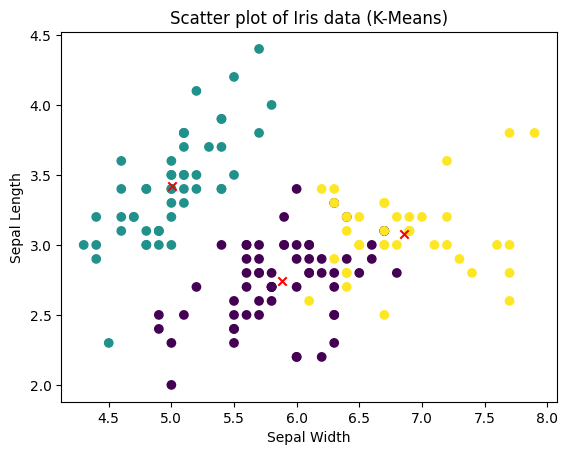

In [7]:
# Create a scatter plot of the data points colored by their predicted cluster labels
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=predicted_label)

# Plot the cluster centroids as red "x" markers
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='red')

# Add labels for the x and y axes
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')

# Add a title to the plot
plt.title('Scatter plot of Iris data (K-Means)')

# Display the plot
plt.show()

**Task 2.3 Gaussan Mixture Models:**

 Gaussian Mixture Models (GMMs) for unsupervised learning, examining their behavior on the Iris dataset. We first load the data, then fit a GMM with 3 clusters to capture potential cluster variations. Each data point's predicted cluster label is determined, visualized in a scatter plot alongside the true labels. Finally, the Gaussian means of each cluster are plotted as red stars

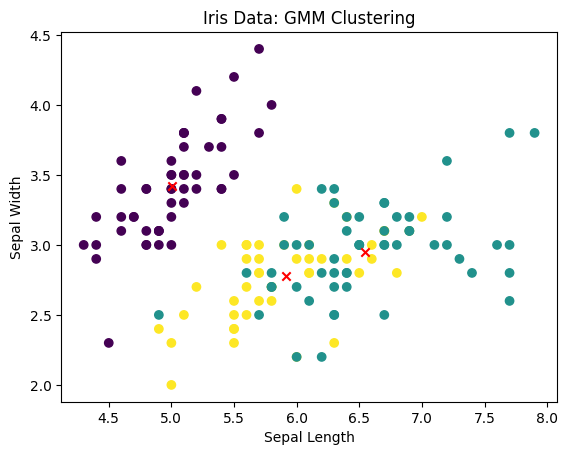

In [63]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0,init_params='kmeans').fit(iris_data)
# ‘random_from_data’ : initial means are randomly selected data points.
# init_params = k means. we usually start from initial guess of parametres using k- means

# Predict cluster membership
predicted_gmm_labels = gmm.predict(iris_data)

# Scatter plot with GMM predictions
plt.scatter(iris_data[:, 0], iris_data[:, 1], c=predicted_gmm_labels)

# Scatter plot with Gaussian means
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', c='red')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Data: GMM Clustering')

plt.show()

In [64]:
posterior_probs = gmm.predict_proba(iris_data)
print("Posterior probabilities shape:", posterior_probs.shape)

Posterior probabilities shape: (150, 3)


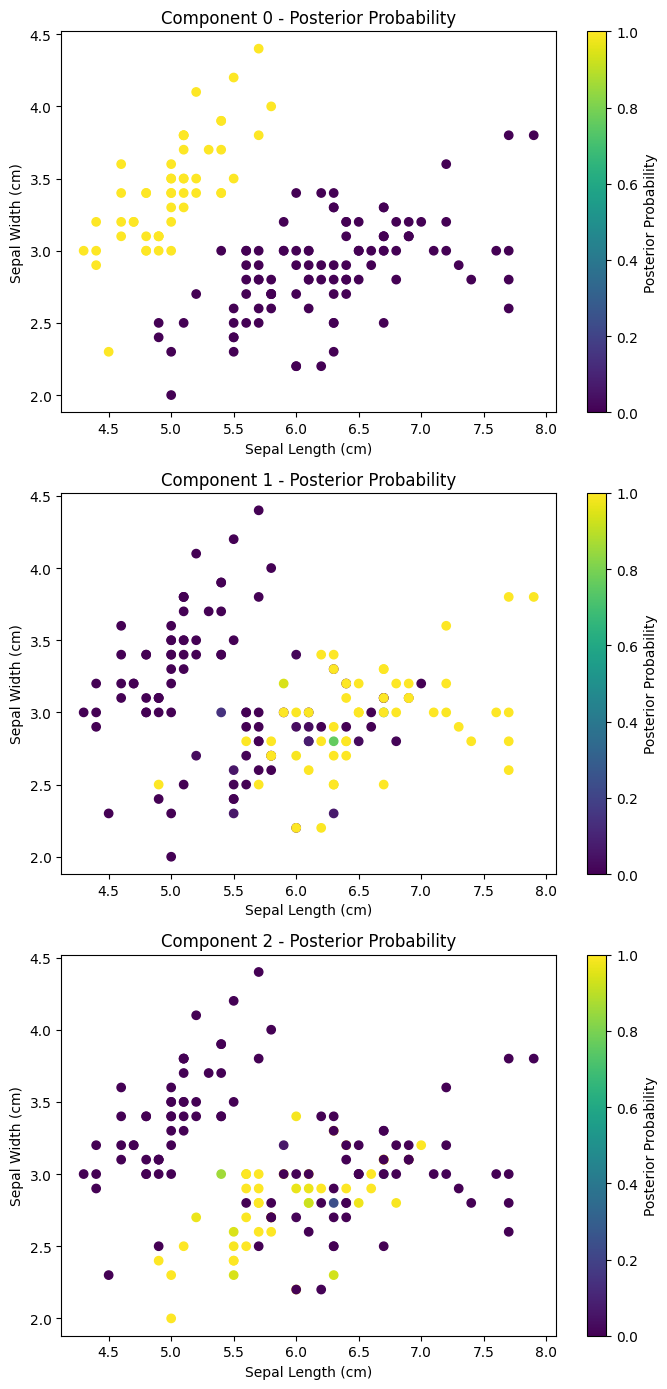

In [65]:
# Define colormap
cmap = plt.cm.viridis

# Create subplots for each component
fig, axes = plt.subplots(3, 1, figsize=(7,14))

for i_component in range(3):
   ax = axes[i_component]

   # Scatter plot with posterior probabilities as color intensity
   ax.scatter(iris_data[:, 0], iris_data[:, 1], c=posterior_probs[:, i_component], cmap=cmap)

   # Add labels, title, and colorbar
   ax.set_title(f"Component {i_component} - Posterior Probability")
   ax.set_xlabel('Sepal Length (cm)')
   ax.set_ylabel('Sepal Width (cm)')

   sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))  # Set colorbar range
   sm.set_array([])
   fig.colorbar(sm, ax=ax, label='Posterior Probability')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


**Task 2.4 Applying the skill:**

In [36]:
task_data = np.load('/content/drive/MyDrive/Colab Notebooks/task2_4.npy')

In [39]:
task_data.shape

(100, 10)

Silhouette_score: 0.4468731109129232


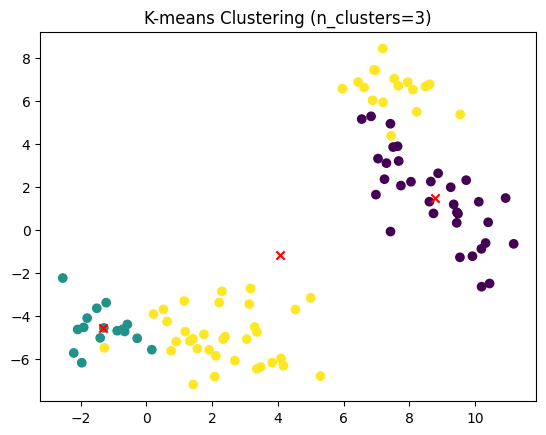

Silhouette_score: 0.5849684584166529


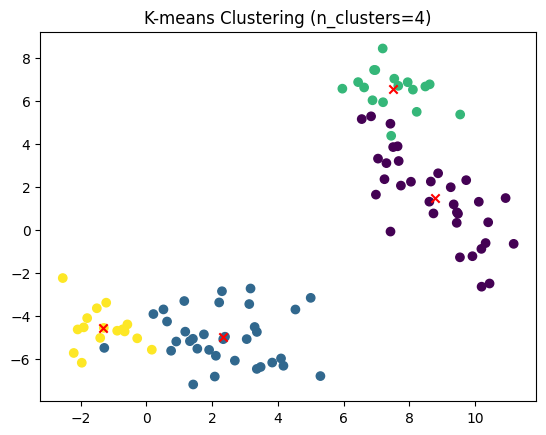

Silhouette_score: 0.6652470032643304


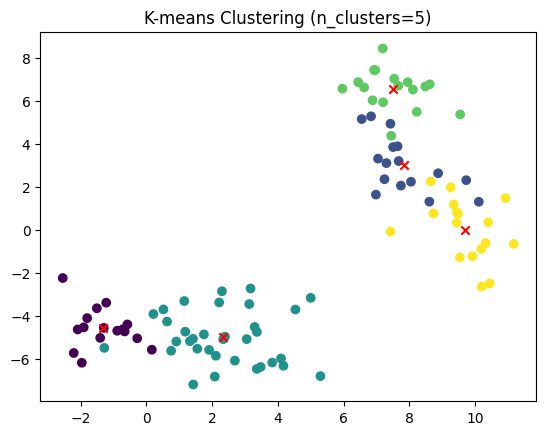

In [58]:
from sklearn.metrics import silhouette_score

for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, n_init="auto")
    kmeans.fit(task_data)

    # Evaluate cluster quality using metrics like silhouette score or Calinski-Harabasz index
    # (consider using libraries like `sklearn.metrics`)

    # Visualize cluster assignments using scatter plots or other techniques
    plt.scatter(task_data[:, 0], task_data[:, 1], c=kmeans.labels_)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red')
    plt.title(f"K-means Clustering (n_clusters={n_clusters})")
    print("Silhouette_score:",silhouette_score(task_data, kmeans.fit_predict(task_data)))
    plt.show()


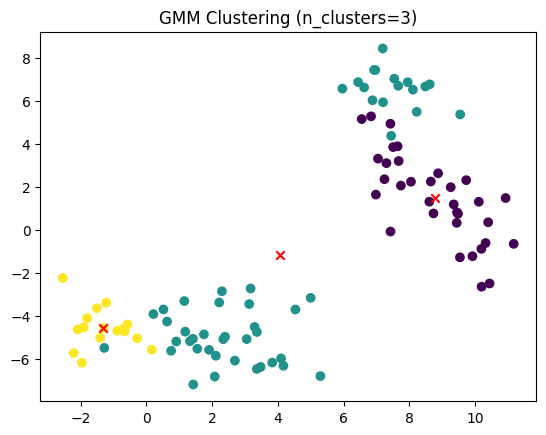

Silhouette_score: 0.6652470032643304


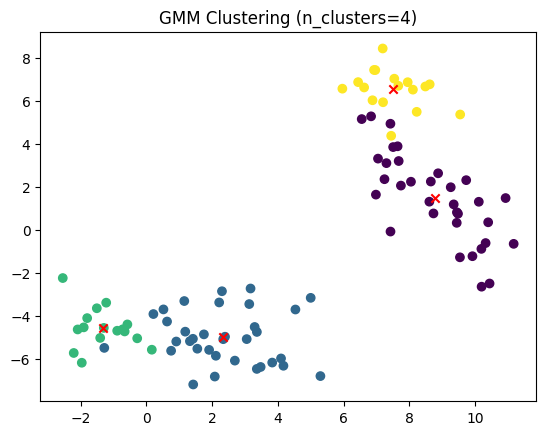

Silhouette_score: 0.6652470032643304


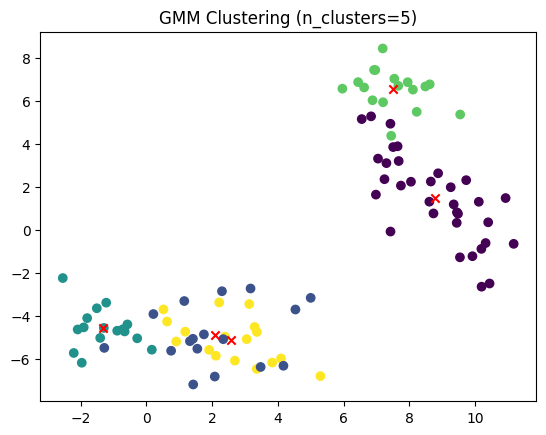

Silhouette_score: 0.6527446056508345


In [59]:
for n_components in range(3, 6):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(task_data)

    predicted_gmm_labels = gmm.predict(task_data)

    # Scatter plot with GMM predictions
    plt.scatter(task_data[:, 0], task_data[:, 1], c=predicted_gmm_labels)

    # Scatter plot with Gaussian means
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', c='red')

    plt.title(f"GMM Clustering (n_clusters={n_components})")
    plt.show()
    print("Silhouette_score:",silhouette_score(task_data, kmeans.fit_predict(task_data)))

After trying with KMeans and GMM clustering and calculating Silhouette_score for each instance, we can conclude that the true number is 4.